In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Código Clases/Prueba False'


model_early_stopping.data-00000-of-00001  model_early_stopping.index


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Reconstruir la arquitectura del modelo
model_reg_es = models.Sequential()

model_reg_es.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 200, 3)))
model_reg_es.add(layers.MaxPooling2D((2, 2)))
model_reg_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg_es.add(layers.MaxPooling2D((2, 2)))
model_reg_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg_es.add(layers.MaxPooling2D((2, 2)))
model_reg_es.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_reg_es.add(layers.MaxPooling2D((2, 2)))

model_reg_es.add(layers.Flatten())
model_reg_es.add(layers.Dense(64, activation='relu'))
model_reg_es.add(layers.Dropout(0.2))
model_reg_es.add(layers.Dense(1, activation='sigmoid'))
model_reg_es.summary()

# Compilar el modelo (necesario si quieres usar el modelo para entrenar o evaluar)
model_reg_es.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Cargar los pesos guardados desde Google Drive

# Crear un objeto Checkpoint
checkpoint = tf.train.Checkpoint(model=model_reg_es)

# Cargar los pesos del checkpoint
checkpoint.restore('/content/drive/MyDrive/Código Clases/Prueba False/model_early_stopping')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,310,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,441,025 (5.50 MB)

 Trainable params: 1,441,025 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics

model_reg_es.compile(optimizer=optimizers.Adam(),
              loss=losses.BinaryCrossentropy(from_logits=False),
              metrics=[metrics.BinaryAccuracy()])

In [ ]:
# Define la ruta a tu carpeta de imágenes
ruta_imagenes = '/content/drive/My Drive/Código Clases/goal'

In [ ]:
from pickle import FALSE
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos para las predicciones
pred_datagen = ImageDataGenerator(rescale=1./255)

# Crea un iterador para cargar las imágenes desde el directorio
pred_generator = pred_datagen.flow_from_directory(
    directory=ruta_imagenes,  # Ruta al directorio donde están las imágenes
    target_size=(300, 200),   # Tamaño de las imágenes (ajústalo si es necesario)
    batch_size=32,            # Número de imágenes por lote
    class_mode=None,          # No hay etiquetas ya que es para predicciones
    shuffle=False,            # Mantén el orden de las imágenes
    color_mode='rgb',          # Ajusta si las imágenes son RGB o escala de grises
    classes=['.'], # This will include all files in the directory
    follow_links=True
)

# Verifica si se encontraron imágenes
if pred_generator.samples == 0:
    print("No se encontraron imágenes en la ruta especificada.")
else:
    # Obtiene los nombres de las imágenes (sin la ruta del directorio)
    nombres_imagenes = [os.path.basename(f) for f in pred_generator.filenames]

    # Genera predicciones utilizando el modelo cargado
    predicciones = model_reg_es.predict(pred_generator)

  # Crea un DataFrame con las predicciones y los nombres de las imágenes
    df = pd.DataFrame({'imagen': nombres_imagenes, 'prediccion': predicciones.flatten()})

  # Guarda el DataFrame como un archivo CSV
    df.to_csv('predicciones_lofitFalse.csv', index=False)

Found 424 images belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 195s 14s/step


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # make sure to import matplotlib

# Define la ruta a la imagen que quieres analizar
ruta_imagen = '/content/drive/MyDrive/Código Clases/goal/10.JPG' # remove extra "./"

# Carga la imagen y preprocesa
img = image.load_img(ruta_imagen, target_size=(300, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

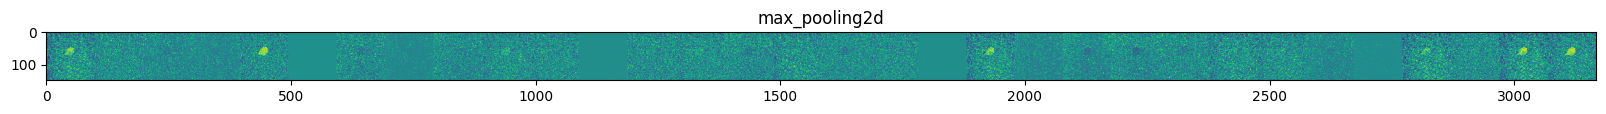

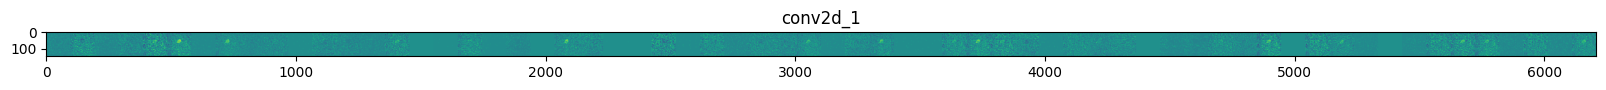

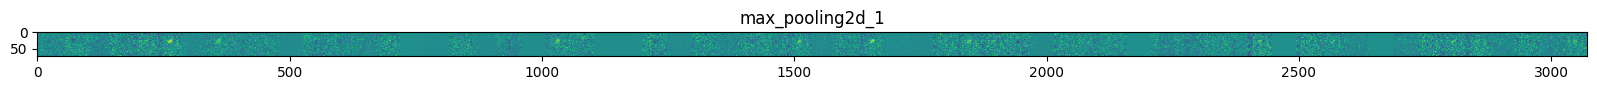

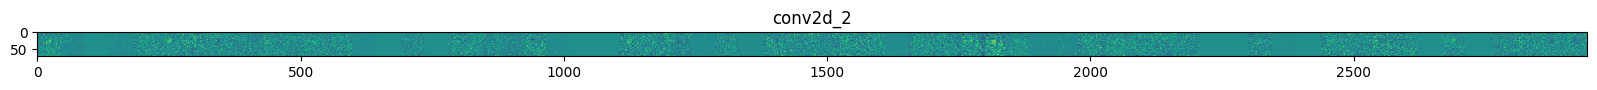

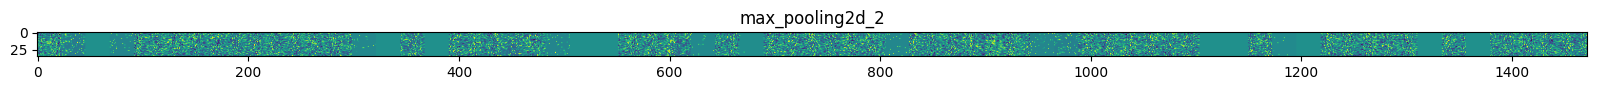

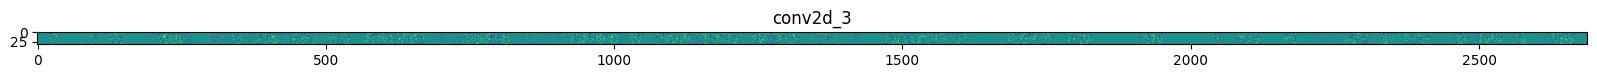

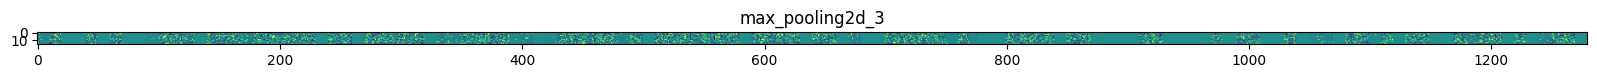

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:  # Solo para capas conv/pooling
        n_features = feature_map.shape[-1]  # Número de características en el mapa
        size_y = feature_map.shape[1]  # Altura del mapa
        size_x = feature_map.shape[2]  # Ancho del mapa

        # Creamos una cuadrícula de visualización adaptada al tamaño real del mapa de características
        display_grid = np.zeros((size_y, size_x * n_features))

        for i in range(n_features):
            # Extraemos el mapa de características para el canal i-ésimo
            x = feature_map[0, :, :, i]

            # Preprocesamos el mapa para mejorar la visualización
            x -= x.mean()
            x /= (x.std() + 1e-5)  # Evitamos división por cero
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Acomodamos el mapa de características en la cuadrícula sin redimensionar
            display_grid[:, i * size_x: (i + 1) * size_x] = x

        # Mostramos el mapa de características
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [ ]:
layer_names = [layer.name for layer in model_reg_es.layers]


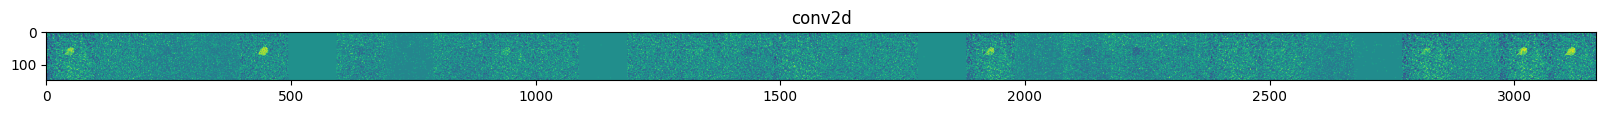

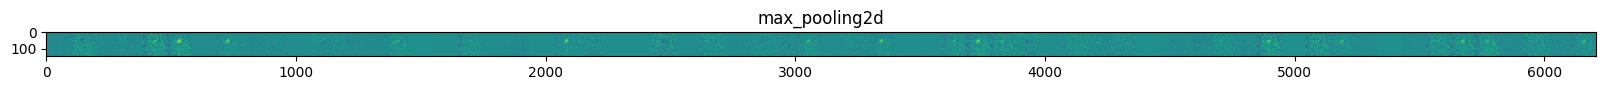

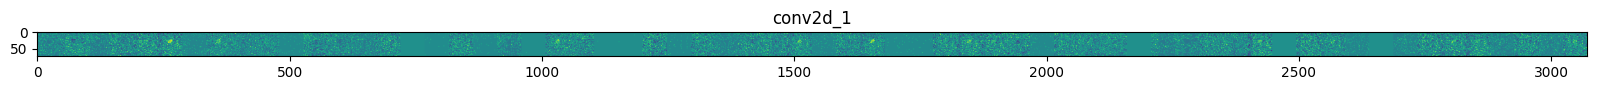

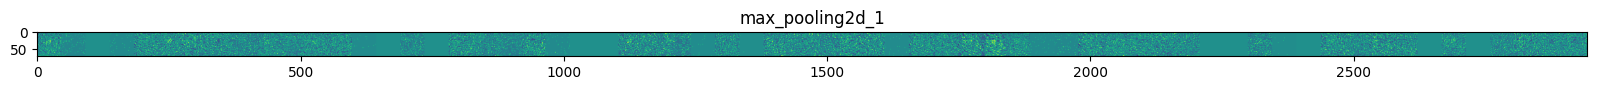

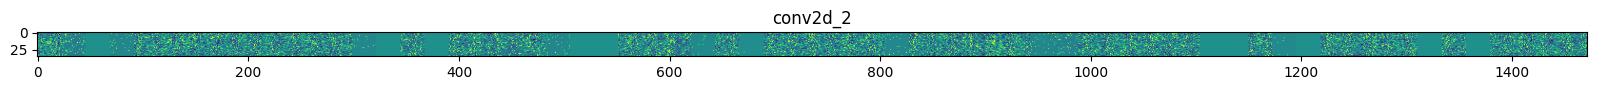

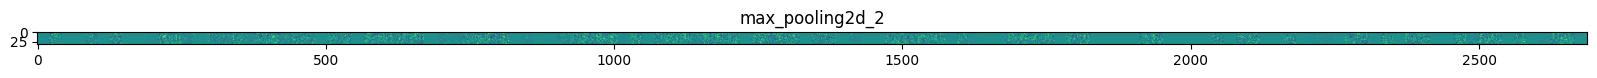

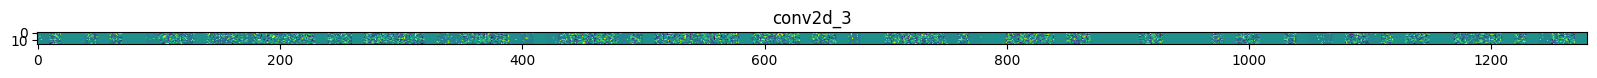

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    # Asegúrate de incluir capas convolucionales y de pooling
    if len(feature_map.shape) == 4:  # Solo para capas conv/pooling
        n_features = feature_map.shape[-1]  # Número de características en el mapa
        size_y = feature_map.shape[1]  # Altura del mapa
        size_x = feature_map.shape[2]  # Ancho del mapa

        # Creamos una cuadrícula de visualización
        display_grid = np.zeros((size_y, size_x * n_features))

        for i in range(n_features):
            # Extraemos el mapa de características para el canal i-ésimo
            x = feature_map[0, :, :, i]

            # Preprocesamos el mapa para mejorar la visualización
            x -= x.mean()
            x /= (x.std() + 1e-5)  # Evitamos división por cero
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Acomodamos el mapa de características en la cuadrícula
            display_grid[:, i * size_x: (i + 1) * size_x] = x

        # Mostramos el mapa de características
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
